<a href="https://colab.research.google.com/github/shachimaurya23/Learning/blob/main/Tensorflow/Sarcasm__Prediction_using__tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic operations to preprocess data

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
sentences=["i love my dog","I, love my cat","you love my dog!","dogs loves cat"]

In [3]:
tokenizer=Tokenizer(num_words=100,oov_token="<OOV") #num_words tells the max number of words allowed in the vocab  priority= freq.of words, sequesnce   eg 2 words occuring in sentences again and again then we see which comes first.
tokenizer.fit_on_texts(sentences)

In [4]:
word_index=tokenizer.word_index
print(word_index)

{'<OOV': 1, 'love': 2, 'my': 3, 'i': 4, 'dog': 5, 'cat': 6, 'you': 7, 'dogs': 8, 'loves': 9}


In [5]:
print(tokenizer.texts_to_sequences(["My hamster loves dogs and cat"]))

[[3, 1, 9, 8, 1, 6]]


In [6]:
sequences = tokenizer.texts_to_sequences(sentences)
print (sequences)

[[4, 2, 3, 5], [4, 2, 3, 6], [7, 2, 3, 5], [8, 9, 6]]


In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded =pad_sequences(sequences)

print(padded)


[[4 2 3 5]
 [4 2 3 6]
 [7 2 3 5]
 [0 8 9 6]]


# Sarcasm Prediction

In [12]:
import json
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2025-01-25 14:23:26--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.207, 209.85.200.207, 142.251.183.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2025-01-25 14:23:26 (131 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [2]:
with open ('/tmp/sarcasm.json',"r") as f:
  datastore=json.load(f)

In [3]:
datastore[:10]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [13]:
len(datastore)

26709

In [4]:
sentences=[]
label=[]

for item in datastore:
  sentences.append(item["headline"])
  label.append(item["is_sarcastic"])

In [16]:
sentences[:10]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages"]

In [17]:
label[:10]

[0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

In [5]:
vocab_size=10000
max_length=100
oov_trunc="<OOV>"
trunc_type="post"
padding_type="post"
embedding_dim=16

In [6]:
X_train,X_test,y_train,y_test=train_test_split(sentences,label,test_size=0.2,random_state=42)

In [9]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_trunc)
#tokenize the train data
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
X_train=tokenizer.texts_to_sequences(X_train)
X_train=pad_sequences(X_train,maxlen=max_length,padding=padding_type,truncating=trunc_type)

#toeknize the test data
tokenizer.fit_on_texts(X_test)
word_index=tokenizer.word_index
X_test=tokenizer.texts_to_sequences(X_test)
X_test=pad_sequences(X_test,maxlen=max_length,padding=padding_type,truncating=trunc_type)


In [13]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [14]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")])

In [16]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

In [44]:
num_epochs=40
history=model.fit(X_train,y_train,epochs=num_epochs,validation_split=0.1,verbose=2)

Epoch 1/40
601/601 - 2s - 3ms/step - binary_accuracy: 0.9924 - loss: 0.0255 - val_binary_accuracy: 0.7946 - val_loss: 1.2452
Epoch 2/40
601/601 - 3s - 5ms/step - binary_accuracy: 0.9894 - loss: 0.0316 - val_binary_accuracy: 0.8067 - val_loss: 1.1934
Epoch 3/40
601/601 - 3s - 5ms/step - binary_accuracy: 0.9858 - loss: 0.0387 - val_binary_accuracy: 0.8049 - val_loss: 1.1581
Epoch 4/40
601/601 - 3s - 4ms/step - binary_accuracy: 0.9878 - loss: 0.0372 - val_binary_accuracy: 0.8035 - val_loss: 1.2796
Epoch 5/40
601/601 - 5s - 8ms/step - binary_accuracy: 0.9890 - loss: 0.0305 - val_binary_accuracy: 0.8058 - val_loss: 1.1893
Epoch 6/40
601/601 - 6s - 9ms/step - binary_accuracy: 0.9927 - loss: 0.0237 - val_binary_accuracy: 0.8072 - val_loss: 1.3053
Epoch 7/40
601/601 - 4s - 7ms/step - binary_accuracy: 0.9824 - loss: 0.0476 - val_binary_accuracy: 0.8002 - val_loss: 0.9393
Epoch 8/40
601/601 - 3s - 5ms/step - binary_accuracy: 0.9883 - loss: 0.0326 - val_binary_accuracy: 0.8053 - val_loss: 1.2469


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 24)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481,301 (1.84 MB)

 Trainable params: 160,433 (626.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,868 (1.22 MB)

In [45]:
X_test_score=model.predict(X_test,verbose=2)

167/167 - 0s - 2ms/step


In [46]:
for i in X_test_score:
  if i[0] < 0.5:
    i[0]=0
  else:
    i[0]=1

In [47]:
correct_predict_count=0
incorrect_predict_count=0
for i,j in zip(X_test_score,y_test):
  # print(i[0])
  if i[0]==j:
    correct_predict_count+=1
  else:
    incorrect_predict_count+=1


In [48]:
correct_predict_count

3171

In [49]:
incorrect_predict_count

2171

In [50]:
test_accuracy=correct_predict_count/len(y_test)
test_accuracy

0.5935979034069637

In [56]:
history.history.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

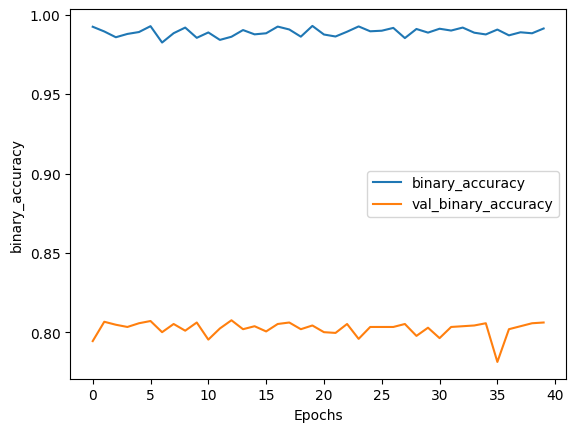

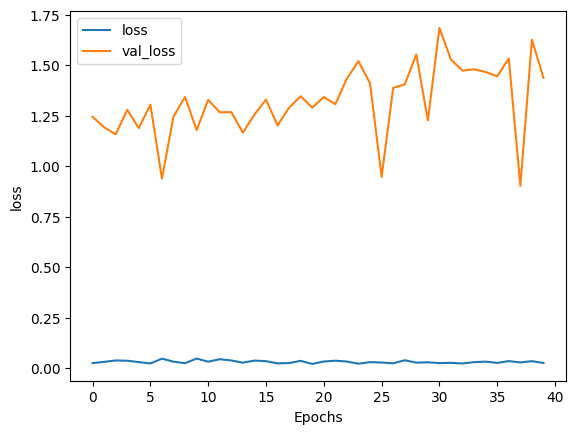

In [55]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "binary_accuracy")
plot_graphs(history, "loss")